In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
links = pd.read_csv('../../../data/links.csv')
movies = pd.read_csv('../../../data/movies.csv')
ratings = pd.read_csv('../../../data/ratings.csv')
tags = pd.read_csv('../../../data/tags.csv')
new = pd.merge(links, movies)
new_2 = pd.merge(new, ratings)
# Drop movieId and timestamp
tags_2 = tags.drop(columns=['movieId', 'timestamp'])
df_pre = pd.merge(new_2, tags_2)
# Drop null values
df = df_pre.dropna()
# replace | with , in the genres column
df['genres'] = df['genres'].str.replace('|',' , ')

<ipython-input-2-86a63a1ab3b0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].str.replace('|',' , ')


In [3]:
df

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),"Adventure , Animation , Children , Comedy , Fa...",7,4.5,1106635946,way too long
1,50,114814,629.0,"Usual Suspects, The (1995)","Crime , Mystery , Thriller",7,4.5,1106635993,way too long
2,58,110877,11010.0,"Postman, The (Postino, Il) (1994)","Comedy , Drama , Romance",7,3.0,1106635520,way too long
3,150,112384,568.0,Apollo 13 (1995),"Adventure , Drama , IMAX",7,4.5,1106635925,way too long
4,165,112864,1572.0,Die Hard: With a Vengeance (1995),"Action , Crime , Thriller",7,4.0,1106635987,way too long
...,...,...,...,...,...,...,...,...,...
4626861,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,psychology
4626862,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,anime
4626863,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,comedy
4626864,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),"Action , Animation",184,3.5,1537110021,gintama


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4626858 entries, 0 to 4626865
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   imdbId     int64  
 2   tmdbId     float64
 3   title      object 
 4   genres     object 
 5   userId     int64  
 6   rating     float64
 7   timestamp  int64  
 8   tag        object 
dtypes: float64(2), int64(4), object(3)
memory usage: 353.0+ MB


In [5]:
df.describe()

,movieId,imdbId,tmdbId,userId,rating,timestamp
count,4.626858e+06,4.626858e+06,4.626858e+06,4.626858e+06,4.626858e+06,4.626858e+06
mean,1.642609e+04,2.788304e+05,2.207540e+04,4.816059e+02,3.273422e+00,1.200676e+09
std,3.167213e+04,5.574376e+05,5.042797e+04,9.823386e+01,9.324715e-01,1.910933e+08
min,1.000000e+00,4.170000e+02,2.000000e+00,2.000000e+00,5.000000e-01,9.746663e+08
25%,1.962000e+03,8.157300e+04,1.710000e+03,4.740000e+02,3.000000e+00,1.063115e+09
50%,4.144000e+03,1.100570e+05,1.017800e+04,4.740000e+02,3.500000e+00,1.108390e+09
75%,7.810000e+03,2.666970e+05,1.878500e+04,4.770000e+02,4.000000e+00,1.457846e+09
max,1.935870e+05,8.391976e+06,5.034750e+05,6.100000e+02,5.000000e+00,1.537355e+09


In [6]:
df.loc[df['tag'] == 'way too long']

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),"Adventure , Animation , Children , Comedy , Fa...",7,4.5,1106635946,way too long
1,50,114814,629.0,"Usual Suspects, The (1995)","Crime , Mystery , Thriller",7,4.5,1106635993,way too long
2,58,110877,11010.0,"Postman, The (Postino, Il) (1994)","Comedy , Drama , Romance",7,3.0,1106635520,way too long
3,150,112384,568.0,Apollo 13 (1995),"Adventure , Drama , IMAX",7,4.5,1106635925,way too long
4,165,112864,1572.0,Die Hard: With a Vengeance (1995),"Action , Crime , Thriller",7,4.0,1106635987,way too long
...,...,...,...,...,...,...,...,...,...
147,48997,396171,1427.0,Perfume: The Story of a Murderer (2006),"Crime , Drama , Thriller",7,2.5,1174263740,way too long
148,49272,381061,36557.0,Casino Royale (2006),"Action , Adventure , Thriller",7,4.5,1165876367,way too long
149,49278,453467,7551.0,Déjà Vu (Deja Vu) (2006),"Action , Sci-Fi , Thriller",7,3.5,1174263775,way too long
150,49286,457939,1581.0,"Holiday, The (2006)","Comedy , Romance",7,0.5,1176181731,way too long


In [7]:
# Drop duplicates
#df = df.drop_duplicates(subset=['movieId'])

In [8]:
#df

In [9]:
df.rating.value_counts()

3.5    1074657
4.0    1062356
3.0     853601
2.5     412794
2.0     401263
4.5     354089
5.0     157719
1.5     154027
1.0      96822
0.5      59530
Name: rating, dtype: int64

<AxesSubplot:>

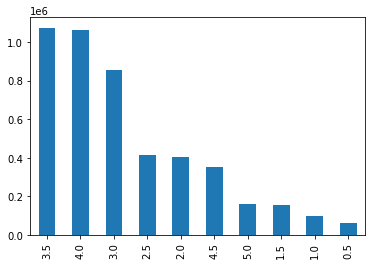

In [10]:
df.rating.value_counts().plot(kind='bar')

In [11]:
df.title.value_counts()

Prestige, The (2006)                                     3371
Lord of the Rings: The Return of the King, The (2003)    3277
Forrest Gump (1994)                                      3235
Batman Begins (2005)                                     3205
Lord of the Rings: The Two Towers, The (2002)            3195
                                                         ... 
Bats (1999)                                                 1
Miracle of Morgan's Creek, The (1944)                       1
Lakeview Terrace (2008)                                     1
World According to Garp, The (1982)                         1
Double Jeopardy (1999)                                      1
Name: title, Length: 6497, dtype: int64

<AxesSubplot:>

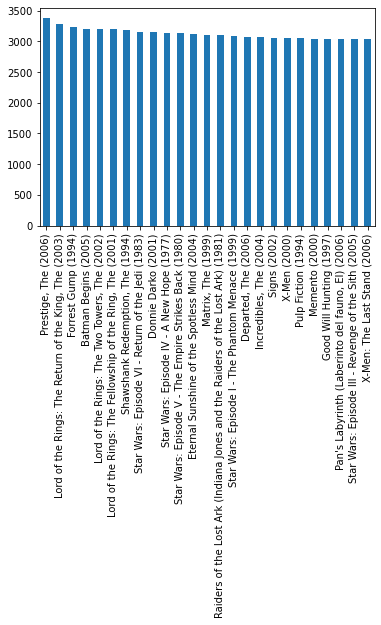

In [12]:
df.title.value_counts().head(25).plot(kind='bar')

In [13]:
cm = df.groupby(['title']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()

In [14]:
cmcount = df['title'].value_counts(normalize=True).to_dict() 
#count of times this show up on the overall data

Text(0, 0.5, 'Weighted Rating')

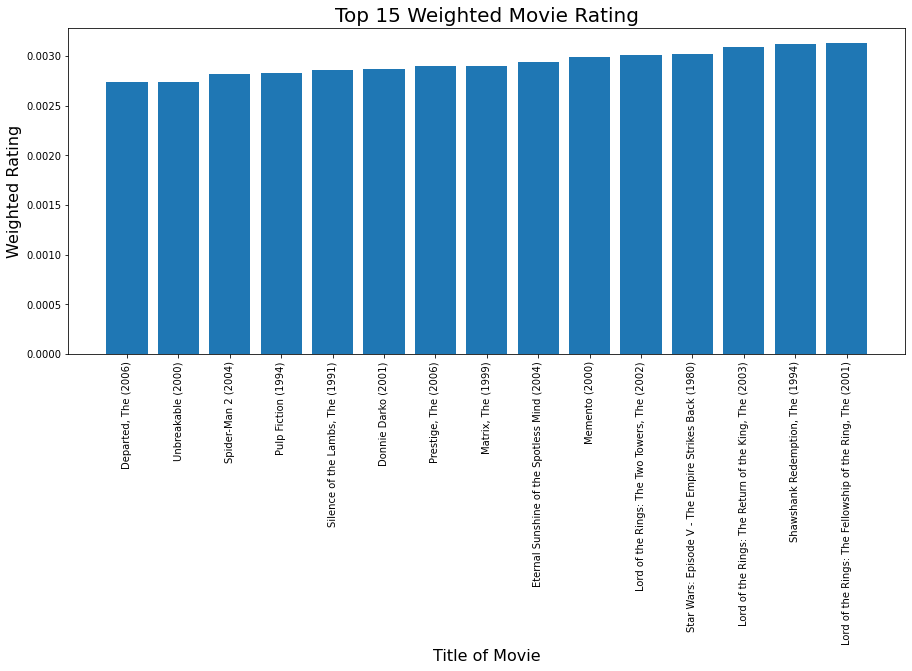

In [15]:
movie = df['title'].unique()
weighted_rating = []
for title in movie:
    count = cmcount[title]
    rating = cm[title]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, movie)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x[-15:], y[-15:])
plt.xticks(rotation=90);
plt.title('Top 15 Weighted Movie Rating', fontsize=20)
plt.xlabel('Title of Movie', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

In [16]:
df.genres.value_counts()

Drama                                                              582040
Comedy                                                             339160
Drama , Romance                                                    215615
Comedy , Drama                                                     184798
Comedy , Romance                                                   178634
                                                                    ...  
Action , Drama , Fantasy , Horror , Mystery , Sci-Fi , Thriller         1
Adventure , Thriller , Western                                          1
Animation , Comedy , Drama , Fantasy                                    1
Action , Drama , War , Western                                          1
Action , Adventure , Children , Fantasy , Mystery , Thriller            1
Name: genres, Length: 836, dtype: int64

<AxesSubplot:>

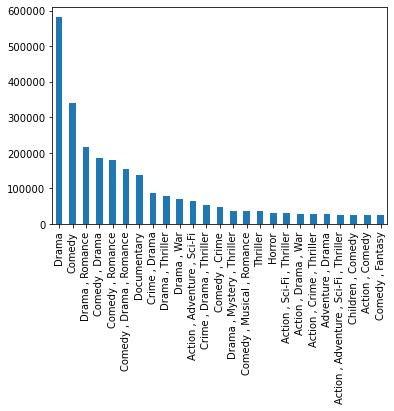

In [17]:
df.genres.value_counts().head(25).plot(kind='bar')

In [18]:
cm = df.groupby(['genres']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()

In [19]:
cmcount = df['genres'].value_counts(normalize=True).to_dict() 

Text(0, 0.5, 'Weighted Rating')

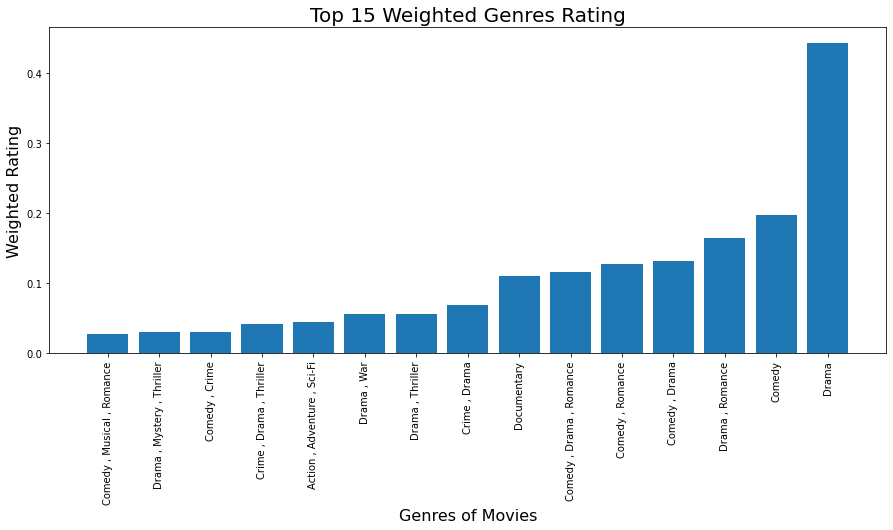

In [20]:
movie = df['genres'].unique()
weighted_rating = []
for genres in movie:
    count = cmcount[genres]
    rating = cm[genres]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, movie)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x[-15:], y[-15:])
plt.xticks(rotation=90);
plt.title('Top 15 Weighted Genres Rating', fontsize=20)
plt.xlabel('Genres of Movies', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

In [21]:
df.tag.value_counts()

In Netflix queue    276148
Disney               44669
religion             43360
crime                37818
superhero            30262
                     ...  
old                     24
moldy                   24
jackie chan             22
kung fu                 22
black hole              21
Name: tag, Length: 1589, dtype: int64

<AxesSubplot:>

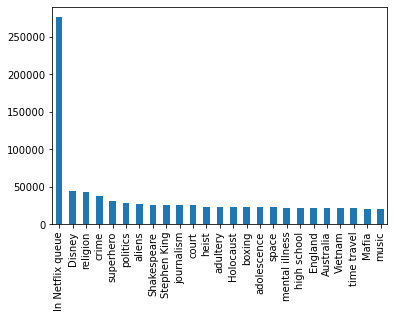

In [22]:
df.tag.value_counts().head(25).plot(kind='bar')

In [23]:
cm = df.groupby(['tag']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()

In [27]:
cmcount = df['title'].value_counts(normalize=True).to_dict() 

In [30]:
movie = df['tag'].unique()
weighted_rating = []
for tag in movie:
    count = cmcount[tag]
    rating = cm[tag]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, movie)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x[-15:], y[-15:])
plt.xticks(rotation=90);
plt.title('Top 15 Weighted Tag Rating', fontsize=20)
plt.xlabel('Tag of Movies', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

KeyError: 'way too long'